### Importación de datos



In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from folium.plugins import HeatMap
from IPython.display import display
from matplotlib.ticker import FuncFormatter
import folium

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda1 = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tiendas_completas = [tienda1,tienda2,tienda3,tienda4]

tienda.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


#1. Análisis de facturación



In [22]:
import pandas as pd

# Lista con los dataframes y nombres para iterar fácilmente
tiendas = [
    (tienda1, 'Tienda 1'),
    (tienda2, 'Tienda 2'),
    (tienda3, 'Tienda 3'),
    (tienda4, 'Tienda 4'),
]

for df, nombre in tiendas:
    print(f"--- {nombre} ---")

    # 1. Facturación total (suma de 'Precio')
    facturacion_total = df['Precio'].sum()
    print(f"Facturación total: ${facturacion_total:,.2f}")

--- Tienda 1 ---
Facturación total: $1,150,880,400.00
--- Tienda 2 ---
Facturación total: $1,116,343,500.00
--- Tienda 3 ---
Facturación total: $1,098,019,600.00
--- Tienda 4 ---
Facturación total: $1,038,375,700.00


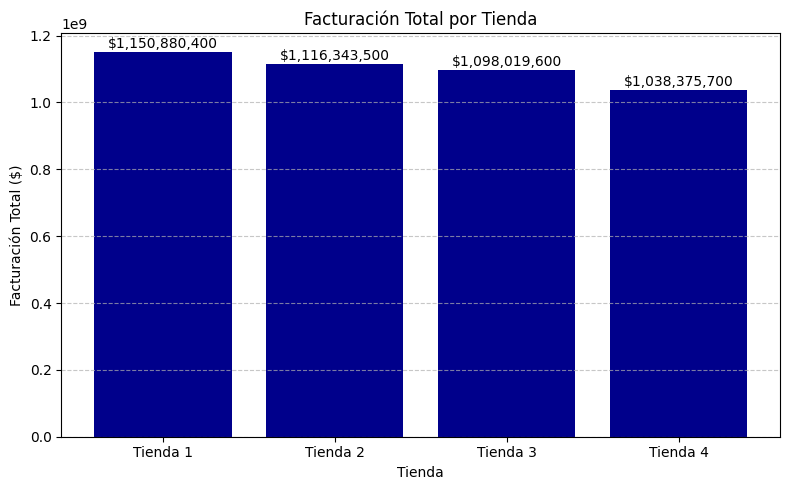

In [27]:
import matplotlib.pyplot as plt

# Calcular facturación total por tienda
nombres_tiendas = []
facturacion_totales = []

for df, nombre in tiendas:
    facturacion_total = df['Precio'].sum()
    nombres_tiendas.append(nombre)
    facturacion_totales.append(facturacion_total)

# Crear gráfico de barras
plt.figure(figsize=(8,5))
plt.bar(nombres_tiendas, facturacion_totales, color='darkblue')
plt.title('Facturación Total por Tienda')
plt.xlabel('Tienda')
plt.ylabel('Facturación Total ($)')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Mostrar valores encima de cada barra
for i, total in enumerate(facturacion_totales):
    plt.text(i, total + max(facturacion_totales)*0.01, f"${total:,.0f}", ha='center')

plt.tight_layout()
plt.show()


# 2. Ventas por categoría

In [35]:
for i, t in enumerate(tiendas_completas, 1):
    ventas = t.groupby("Categoría del Producto")["Precio"].sum()#Agrupamos por categoría y sumamos el precio
    ventas = ventas.sort_values(ascending=False)
    print(f"\n Ventas Tienda {i} por Categoria")
    print(ventas) #Imprimimos las ventas por categoría de cada tienda


 Ventas Tienda 1 por Categoria
Categoría del Producto
Electrónicos               429493500.0
Electrodomésticos          363685200.0
Muebles                    187633700.0
Instrumentos musicales      91299000.0
Deportes y diversión        39290000.0
Juguetes                    17995700.0
Artículos para el hogar     12698400.0
Libros                       8784900.0
Name: Precio, dtype: float64

 Ventas Tienda 2 por Categoria
Categoría del Producto
Electrónicos               410831100.0
Electrodomésticos          348567800.0
Muebles                    176426300.0
Instrumentos musicales     104990300.0
Deportes y diversión        34744500.0
Juguetes                    15945400.0
Artículos para el hogar     14746900.0
Libros                      10091200.0
Name: Precio, dtype: float64

 Ventas Tienda 3 por Categoria
Categoría del Producto
Electrónicos               410775800.0
Electrodomésticos          329237900.0
Muebles                    201072100.0
Instrumentos musicales      77380900

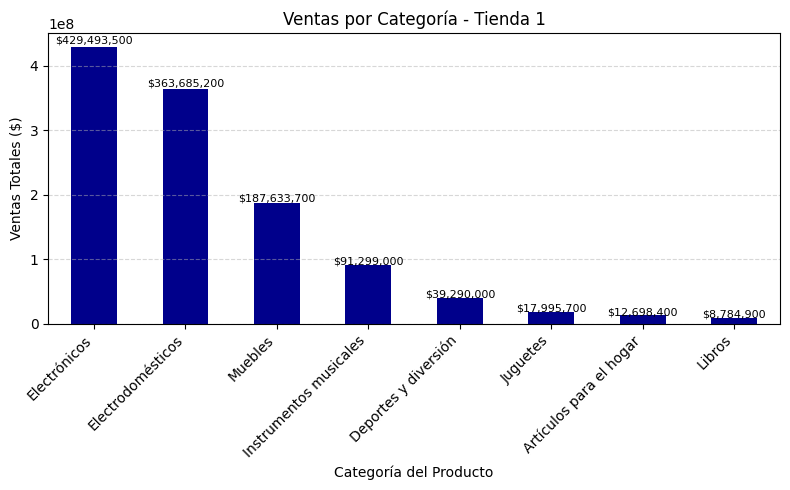

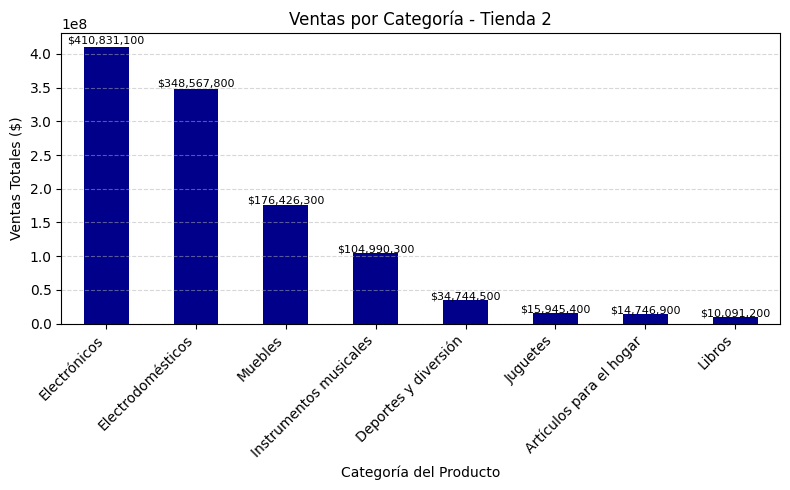

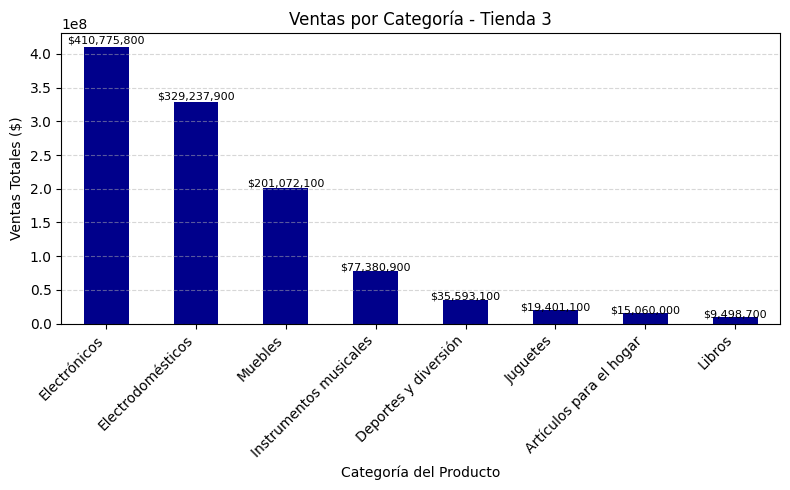

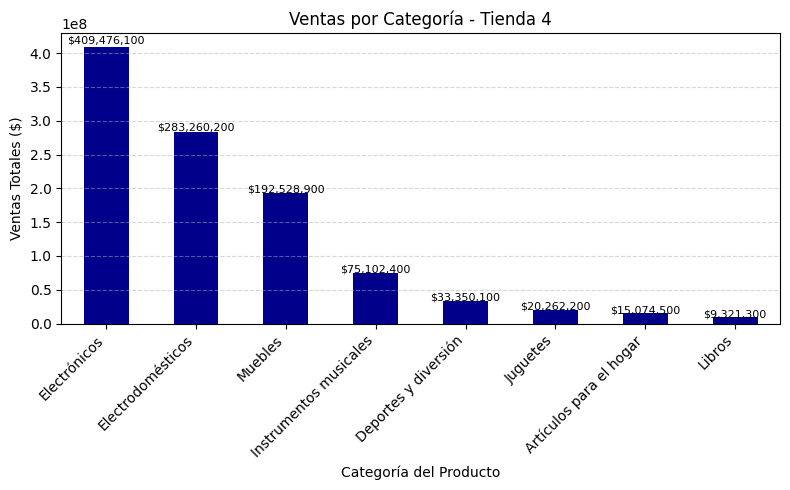

In [54]:


# Recorremos cada tienda para graficar sus ventas por categoría
for i, t in enumerate(tiendas_completas, 1):
    ventas = t.groupby("Categoría del Producto")["Precio"].sum()
    ventas = ventas.sort_values(ascending=False)

    # Crear gráfico de barras
    plt.figure(figsize=(8,5))
    ventas.plot(kind='bar', color='darkblue')
    plt.title(f'Ventas por Categoría - Tienda {i}')
    plt.xlabel('Categoría del Producto')
    plt.ylabel('Ventas Totales ($)')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.grid(axis='y', linestyle='--', alpha=0.5)

    # Mostrar valores encima de cada barra
    for index, value in enumerate(ventas):
        plt.text(index, value + value*0.01, f"${value:,.0f}", ha='center', fontsize=8, rotation=0)

    plt.show()


# 3. Calificación promedio de la tienda


In [36]:
for i, t in enumerate(tiendas_completas, 1):
    valoracion = t["Calificación"].mean().round(2) #Agrupamos por tienda y sacamos la media de la valoración
    print(f"\n Valoración media de la Tienda {i}: {valoracion}")



 Valoración media de la Tienda 1: 3.98

 Valoración media de la Tienda 2: 4.04

 Valoración media de la Tienda 3: 4.05

 Valoración media de la Tienda 4: 4.0


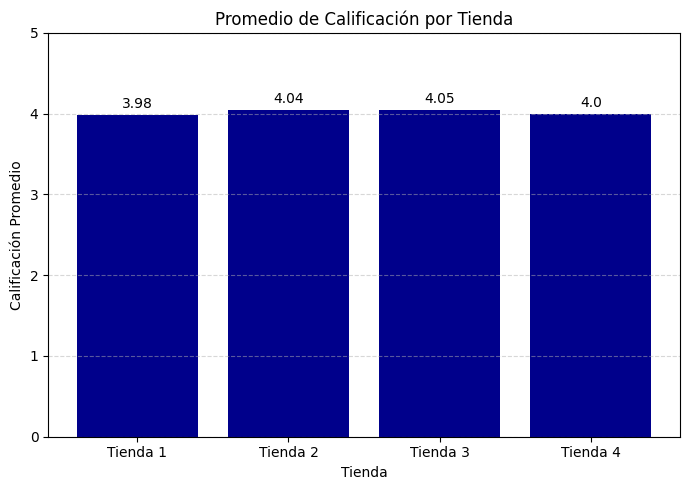

In [39]:
import matplotlib.pyplot as plt

# Obtener promedios de calificación
nombres_tiendas = []
valoraciones = []

for i, t in enumerate(tiendas_completas, 1):
    valoracion = t["Calificación"].mean().round(2)
    nombres_tiendas.append(f"Tienda {i}")
    valoraciones.append(valoracion)

# Crear gráfico de barras
plt.figure(figsize=(7, 5))
bars = plt.bar(nombres_tiendas, valoraciones, color='darkblue')

# Añadir títulos y etiquetas
plt.title("Promedio de Calificación por Tienda")
plt.xlabel("Tienda")
plt.ylabel("Calificación Promedio")
plt.ylim(0, 5)  # escala de 0 a 5 estrellas
plt.grid(axis='y', linestyle='--', alpha=0.5)

# Añadir valores encima de las barras
for bar, val in zip(bars, valoraciones):
    plt.text(bar.get_x() + bar.get_width()/2, val + 0.05, f"{val}", ha='center', va='bottom')

plt.tight_layout()
plt.show()


# 4. Productos más y menos vendidos

In [51]:
for i, t in enumerate(tiendas_completas, 1):
    productos_ventas = t["Producto"].value_counts()
    top10 = productos_ventas.head(10)
    bottom10 = productos_ventas.tail(10)

    print(f"\nTienda {i}")
    print("Top 10 productos más vendidos:")
    for producto, cantidad in top10.items():
        print(f"  - {producto}: {cantidad} ventas")

    print("\nTop 10 productos menos vendidos:")
    for producto, cantidad in bottom10.items():
        print(f"  - {producto}: {cantidad} ventas")




Tienda 1
Top 10 productos más vendidos:
  - Microondas: 60 ventas
  - TV LED UHD 4K: 60 ventas
  - Armario: 60 ventas
  - Secadora de ropa: 58 ventas
  - Mesa de noche: 56 ventas
  - Bloques de construcción: 56 ventas
  - Balón de baloncesto: 55 ventas
  - Bicicleta: 54 ventas
  - Vaso térmico: 54 ventas
  - Refrigerador: 54 ventas

Top 10 productos menos vendidos:
  - Muñeca bebé: 40 ventas
  - Mesa de comedor: 40 ventas
  - Dinosaurio Rex: 40 ventas
  - Cuerda para saltar: 40 ventas
  - Mochila: 39 ventas
  - Ciencia de datos con Python: 39 ventas
  - Pandereta: 36 ventas
  - Olla de presión: 35 ventas
  - Auriculares con micrófono: 33 ventas
  - Celular ABXY: 33 ventas

Tienda 2
Top 10 productos más vendidos:
  - Iniciando en programación: 65 ventas
  - Microondas: 62 ventas
  - Batería: 61 ventas
  - Guitarra acústica: 58 ventas
  - Pandereta: 58 ventas
  - Secadora de ropa: 57 ventas
  - Iphone 15: 55 ventas
  - Bloques de construcción: 54 ventas
  - Armario: 54 ventas
  - Set de

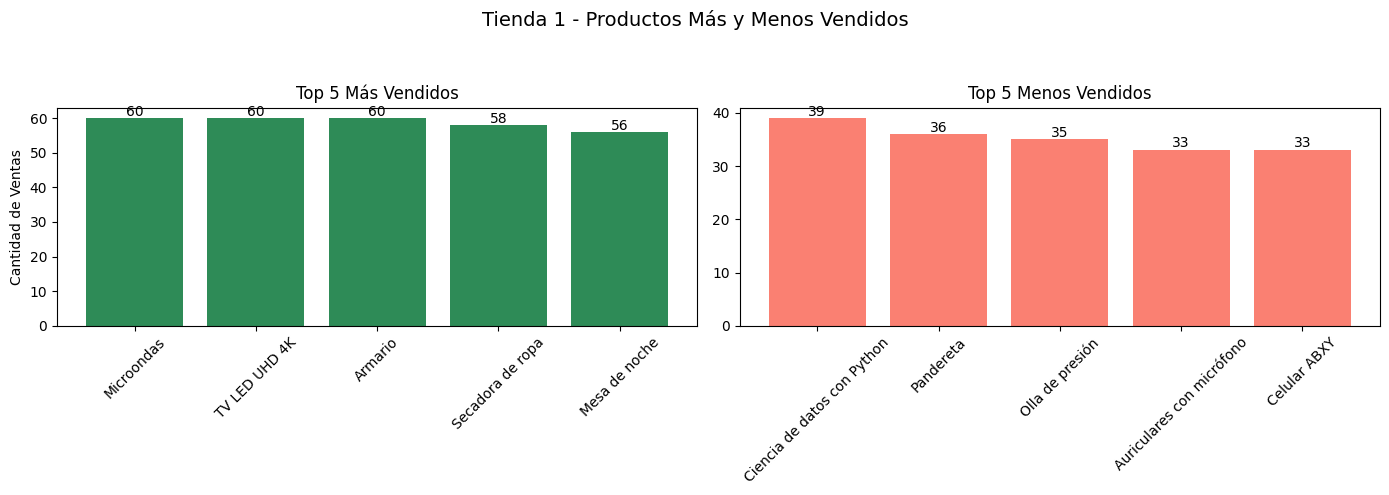

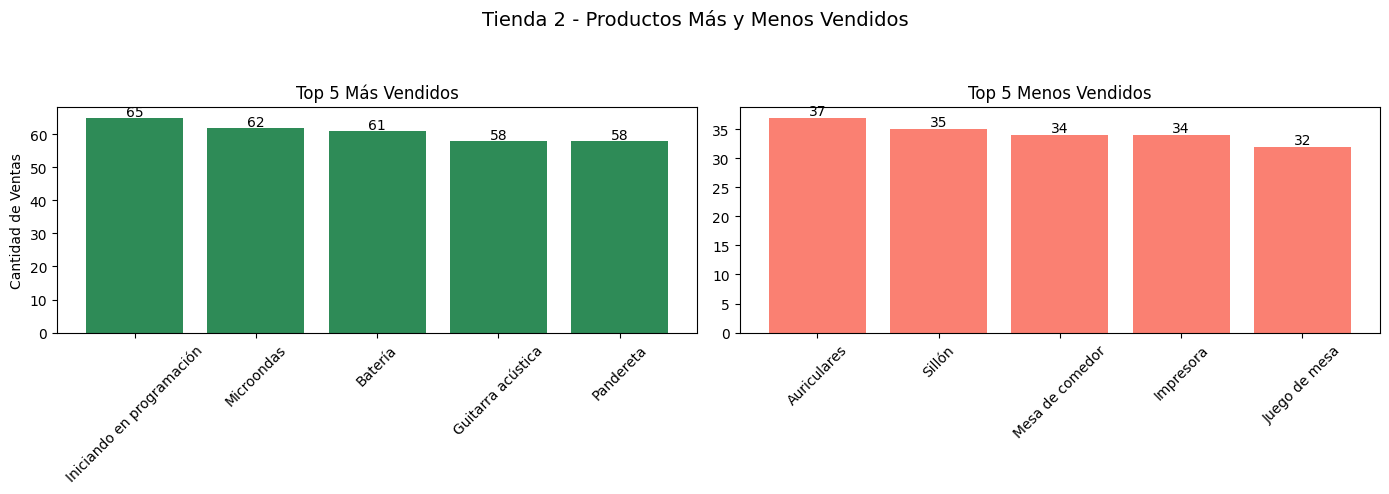

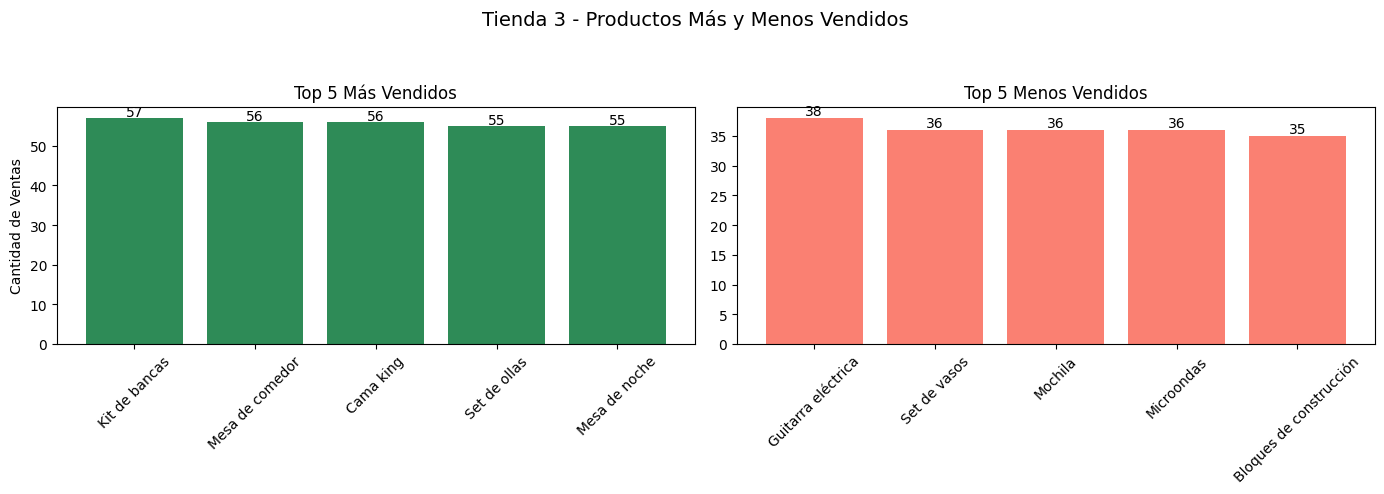

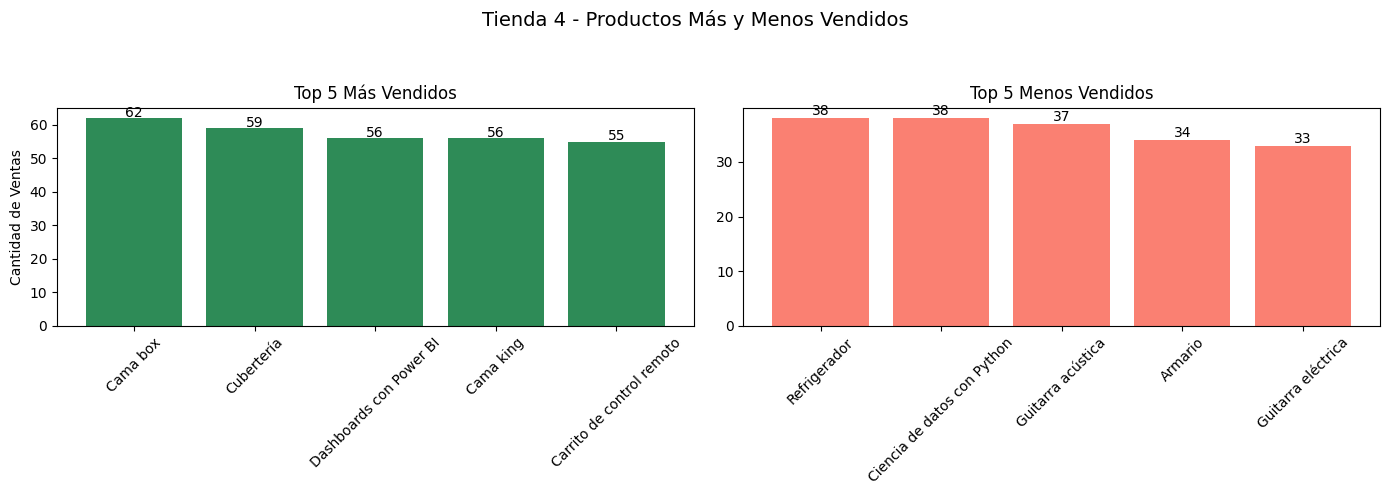

In [49]:


for i, t in enumerate(tiendas_completas, 1):
    conteo_productos = t["Producto"].value_counts()

    top5 = conteo_productos.head(5)
    bottom5 = conteo_productos.tail(5)

    # Crear figura con 2 subplots lado a lado
    fig, axes = plt.subplots(1, 2, figsize=(14, 5))
    fig.suptitle(f"Tienda {i} - Productos Más y Menos Vendidos", fontsize=14)

    # Gráfico de Top 5 más vendidos
    axes[0].bar(top5.index, top5.values, color='seagreen')
    axes[0].set_title("Top 5 Más Vendidos")
    axes[0].set_ylabel("Cantidad de Ventas")
    axes[0].tick_params(axis='x', rotation=45)

    # Mostrar valores encima de las barras
    for idx, val in enumerate(top5.values):
        axes[0].text(idx, val + 0.5, str(val), ha='center')

    # Gráfico de Top 5 menos vendidos
    axes[1].bar(bottom5.index, bottom5.values, color='salmon')
    axes[1].set_title("Top 5 Menos Vendidos")
    axes[1].tick_params(axis='x', rotation=45)

    for idx, val in enumerate(bottom5.values):
        axes[1].text(idx, val + 0.5, str(val), ha='center')

    plt.tight_layout(rect=[0, 0, 1, 0.93])
    plt.show()


# 5. Envío promedio por tienda

In [46]:
for i, t in enumerate(tiendas_completas, 1):
    costo_envio = t["Costo de envío"].mean()
    costo_envio = round(costo_envio, 2)
    costo_envio = "${:,.2f}".format(costo_envio) #Formateamos el costo de envio
    print(f"\n El costo promedio de envio de la tienda {i} es: {costo_envio}")


 El costo promedio de envio de la tienda 1 es: $26,018.61

 El costo promedio de envio de la tienda 2 es: $25,216.24

 El costo promedio de envio de la tienda 3 es: $24,805.68

 El costo promedio de envio de la tienda 4 es: $23,459.46


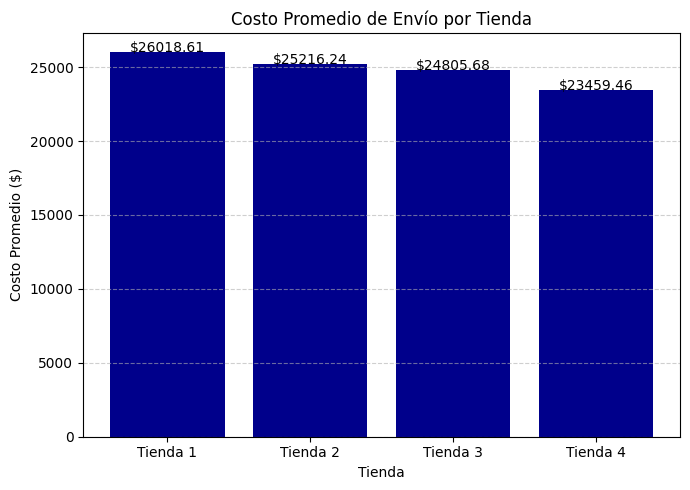

In [52]:


# Calcular costo promedio de envío por tienda
nombres_tiendas = []
costos_envio = []

for i, t in enumerate(tiendas_completas, 1):
    promedio = t["Costo de envío"].mean()
    nombres_tiendas.append(f"Tienda {i}")
    costos_envio.append(round(promedio, 2))

# Crear gráfico de barras
plt.figure(figsize=(7, 5))
bars = plt.bar(nombres_tiendas, costos_envio, color='darkblue')

plt.title("Costo Promedio de Envío por Tienda")
plt.xlabel("Tienda")
plt.ylabel("Costo Promedio ($)")
plt.grid(axis='y', linestyle='--', alpha=0.6)

# Mostrar los valores encima de cada barra
for i, costo in enumerate(costos_envio):
    plt.text(i, costo + 0.05, f"${costo:.2f}", ha='center')

plt.tight_layout()
plt.show()


# **Introducción**
Se llevó a cabo un análisis comparativo entre la Tienda 1, Tienda 2, Tienda 3 y Tienda 4, evaluando distintos indicadores de desempeño: ingresos totales, ventas por categoría, calificación promedio de los clientes, comportamiento de los productos (más y menos vendidos, y un puntaje asociado), costos promedio de envío y distribución geográfica de las ventas. El propósito del análisis es determinar cuál de las tiendas presenta el perfil más adecuado para ser desinvertida o vendida, considerando tanto sus fortalezas como sus debilidades.

# **Resumen Comparativo por Tienda**
#Tienda 1:
Es la tienda con mayores ingresos (alrededor de USD 1,151 millones), impulsada por una cobertura geográfica amplia y un rendimiento sólido en ciudades medianas y pequeñas. No obstante, presenta la calificación promedio más baja del grupo (3.98, aunque la diferencia es leve), el costo de envío más elevado (USD 26.019) y el puntaje más negativo en el ranking de productos (-9), lo cual podría indicar acumulación de productos de baja rotación o menor aceptación en el mercado.

#Tienda 2:
Se posiciona en segundo lugar en términos de ingresos (USD 1,116 millones) y en calificación promedio (4.04). Su fortaleza radica en su excelente desempeño en grandes mercados como Bogotá y Medellín, además de contar con los dos productos más vendidos del total analizado. Su puntaje en el ranking de productos es el mejor (-1), reflejando un portafolio de productos exitoso. En el lado negativo, tiene el producto menos vendido de todos y el segundo costo de envío más alto (USD 25.216).

#Tienda 3:
Destaca por tener la calificación promedio más alta (4.05), un costo de envío relativamente bajo (USD 24.806, tercer lugar) y un puntaje de productos moderadamente bueno (-6), al evitar productos con ventas extremadamente bajas. Sin embargo, ocupa el tercer lugar en ingresos (USD 1,098 millones) y no tiene presencia en el Top 5 de productos más vendidos, dependiendo fuertemente de sus ventas en Bogotá y Medellín.

#Tienda 4:
Registra los ingresos más bajos (USD 1,038 millones) y un desempeño territorial generalmente más débil, aunque lidera en ciudades como Bogotá y Barranquilla. Entre sus puntos fuertes están el menor costo de envío promedio (USD 23.459), una calificación decente (4.00, tercer lugar), y un buen puntaje de productos (-4), gracias a la presencia en el segundo y quinto lugar de los más vendidos.

#**Análisis para la Decisión de Venta**
La elección de qué tienda vender dependerá de la estrategia empresarial:

Vender Tienda 4, la de menor facturación, permitiría liberar recursos, aunque implicaría perder la operación más eficiente en términos logísticos.

Vender Tienda 3, que tiene la mejor calificación y buenos costos operativos, podría ser contraproducente si se valora la estabilidad y satisfacción del cliente, a pesar de la falta de productos destacados.

Vender Tienda 2 significaría renunciar al mayor potencial en términos de productos exitosos, buena facturación y sólida percepción del cliente.

Vender Tienda 1, a pesar de ser la que más ingresos genera, podría representar una decisión estratégica: permite capitalizar su alto valor actual y evitar riesgos a futuro debido a sus altos costos de operación, menor satisfacción relativa del cliente y bajo desempeño de productos.

#**Conclusión**
Con base en el análisis integral, la opción recomendada es vender la Tienda 1.

#Justificación:
Aunque actualmente es la tienda con mayores ingresos, presenta múltiples señales de alerta en su operación. Tiene el costo de envío más elevado, la calificación más baja entre las cuatro tiendas (aunque sigue siendo alta), y el peor puntaje de productos, lo cual sugiere posibles problemas de inventario o estrategias de venta ineficientes. Venderla en este momento permitiría al Sr. Juan obtener el mayor retorno por su activo más valioso y redirigir recursos hacia tiendas con perfiles más equilibrados: la Tienda 2 por su dinamismo y potencial, y la Tienda 3 por su estabilidad operativa y satisfacción del cliente. En resumen, vender Tienda 1 es una decisión anticipada que permite maximizar valor antes de que sus debilidades estructurales afecten su rentabilidad futura.